In [1]:
import numpy as np
np.set_printoptions(linewidth=10000, threshold=10000)
import matplotlib.pyplot as plt

def numerize_map(amap):
    map_numer = np.zeros_like(amap, dtype=int)
    for pos in np.argwhere(amap=="S"):    map_numer[tuple(pos)] = -1
    for pos in np.argwhere(amap == "E"):  map_numer[tuple(pos)] = -2
    for pos in np.argwhere(amap=="#"):    map_numer[tuple(pos)] = 3
    return map_numer

def plot_map(amap: np.array, figsize = (4,4), cmap='Accent'):
    plt.rcParams['figure.figsize'] = figsize
    plt.matshow(amap, cmap=cmap)
    if amap.shape[0] < 50:
        plt.yticks(range(amap.shape[0]))
        plt.xticks(range(amap.shape[1]))
        plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.5))
        plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(0.5))
        plt.grid(axis="both", which="minor", linewidth=.5)
    else:
        plt.axis('off')

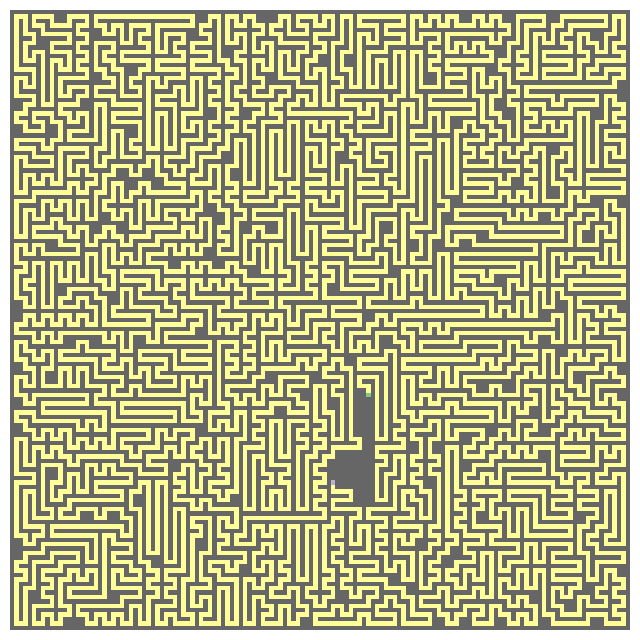

In [39]:
themap = np.genfromtxt('input20.txt', delimiter=1, comments=None, dtype=str)
themap = numerize_map(themap)
start, end = tuple(np.argwhere(themap==-1)[0]), tuple(np.argwhere(themap==-2)[0])
plot_map(themap, figsize=(8,8))

In [146]:
def find_normal_path(themap, start, end):
    normal_path = [start]
    while normal_path[-1] != end:
        current = normal_path[-1]
        neighbors = {tuple(np.array(current)+delta) for delta in [(0,1), (1,0), (0,-1), (-1,0)]}
        neighbors = {n for n in neighbors if themap[n] != 3}
        if len(normal_path) > 1: neighbors -= {normal_path[-2]}
        if len(neighbors) > 1: print("too many neighbors")
        normal_path.append(neighbors.pop())
    return normal_path

In [147]:
path = find_normal_path(themap, start, end)
# for pos in path: themap[pos] = 1
# plot_map(themap, figsize=(8,8))
len(path)

9449

Just find the shortcut points on the path (a list) and their position with .index<br>
No diagonals: from a point in path, find wall, then the post-shortcut point must be straight after it

In [5]:
gains = {}
path = find_normal_path(themap, start, end)
pathdict = {point:path.index(point) for point in path} #to speed up the search
for point in path:
    fourdir = [np.array(d) for d in [(0,1), (1,0), (0,-1), (-1,0)]]
    dirs = [d for d in fourdir if themap[tuple(np.array(point)+d)]==3]
    dirs = [d for d in dirs if tuple(np.array(point)+2*d) in pathdict]
    for d in dirs:
        gain = pathdict[tuple(np.array(point)+2*d)] - pathdict[point] - 2
        if gain>=100:
            if gain not in gains: gains.update({gain:0})
            gains[gain] += 1
print(sum(gains.values()), gains)

1327 {480: 2, 472: 3, 460: 2, 192: 7, 452: 3, 190: 1, 188: 6, 9280: 1, 9278: 1, 9276: 1, 180: 13, 178: 9, 176: 15, 174: 7, 172: 17, 164: 12, 9252: 1, 9260: 1, 9250: 1, 9248: 1, 9240: 1, 9238: 1, 9236: 1, 144: 21, 132: 16, 136: 22, 9220: 1, 9224: 1, 9218: 1, 9216: 1, 120: 11, 118: 7, 104: 22, 116: 20, 102: 13, 100: 30, 9204: 1, 9188: 1, 8864: 1, 8862: 1, 8860: 1, 8856: 1, 8854: 1, 8848: 1, 8852: 1, 256: 8, 252: 10, 200: 7, 198: 3, 196: 8, 168: 12, 166: 4, 128: 14, 126: 9, 124: 16, 122: 3, 112: 17, 824: 1, 822: 1, 820: 1, 818: 1, 816: 1, 814: 1, 812: 2, 810: 1, 808: 1, 806: 1, 804: 1, 760: 3, 758: 1, 756: 3, 724: 2, 722: 2, 720: 2, 712: 1, 710: 1, 708: 1, 696: 1, 692: 2, 690: 2, 688: 2, 288: 4, 286: 1, 284: 4, 250: 7, 248: 12, 236: 12, 234: 8, 232: 11, 152: 12, 150: 6, 148: 17, 140: 19, 138: 12, 114: 9, 108: 19, 8924: 1, 8922: 1, 8920: 1, 8876: 1, 4436: 1, 4434: 1, 340: 5, 4432: 1, 332: 3, 336: 4, 224: 10, 208: 6, 206: 2, 204: 4, 142: 8, 396: 5, 282: 3, 280: 7, 278: 3, 276: 7, 274: 3, 27

In [8]:
from multiset import Multiset as mset
gains = mset()
path = find_normal_path(themap, start, end)
pathdict = {point:path.index(point) for point in path} #to speed up the search
for point in path:
    fourdir = [np.array(d) for d in [(0,1), (1,0), (0,-1), (-1,0)]]
    dirs = [d for d in fourdir if themap[tuple(np.array(point)+d)]==3]
    dirs = [d for d in dirs if tuple(np.array(point)+2*d) in pathdict]
    for d in dirs:
        gain = pathdict[tuple(np.array(point)+2*d)] - pathdict[point] - 2
        if gain>=100: gains.add(gain)
print(len(gains))
display(gains)

1327


Multiset({480: 2, 472: 3, 460: 2, 192: 7, 452: 3, 190: 1, 188: 6, 9280: 1, 9278: 1, 9276: 1, 180: 13, 178: 9, 176: 15, 174: 7, 172: 17, 164: 12, 9252: 1, 9260: 1, 9250: 1, 9248: 1, 9240: 1, 9238: 1, 9236: 1, 144: 21, 132: 16, 136: 22, 9220: 1, 9224: 1, 9218: 1, 9216: 1, 120: 11, 118: 7, 104: 22, 116: 20, 102: 13, 100: 30, 9204: 1, 9188: 1, 8864: 1, 8862: 1, 8860: 1, 8856: 1, 8854: 1, 8848: 1, 8852: 1, 256: 8, 252: 10, 200: 7, 198: 3, 196: 8, 168: 12, 166: 4, 128: 14, 126: 9, 124: 16, 122: 3, 112: 17, 824: 1, 822: 1, 820: 1, 818: 1, 816: 1, 814: 1, 812: 2, 810: 1, 808: 1, 806: 1, 804: 1, 760: 3, 758: 1, 756: 3, 724: 2, 722: 2, 720: 2, 712: 1, 710: 1, 708: 1, 696: 1, 692: 2, 690: 2, 688: 2, 288: 4, 286: 1, 284: 4, 250: 7, 248: 12, 236: 12, 234: 8, 232: 11, 152: 12, 150: 6, 148: 17, 140: 19, 138: 12, 114: 9, 108: 19, 8924: 1, 8922: 1, 8920: 1, 8876: 1, 4436: 1, 4434: 1, 340: 5, 4432: 1, 332: 3, 336: 4, 224: 10, 208: 6, 206: 2, 204: 4, 142: 8, 396: 5, 282: 3, 280: 7, 278: 3, 276: 7, 274: 3

Part II

In [141]:
themap = np.genfromtxt('input20.txt', delimiter=1, comments=None, dtype=str)
themap = numerize_map(themap)
start, end = tuple(np.argwhere(themap==-1)[0]), tuple(np.argwhere(themap==-2)[0])

In [142]:
def find_normal_path(themap, start, end):
    normal_path = [start]
    while normal_path[-1] != end:
        current = normal_path[-1]
        neighbors = {tuple(np.array(current)+delta) for delta in [(0,1), (1,0), (0,-1), (-1,0)]}
        neighbors = {n for n in neighbors if themap[n] != 3}
        if len(normal_path) > 1: neighbors -= {normal_path[-2]}
        if len(neighbors) > 1: print("too many neighbors")
        normal_path.append(neighbors.pop())
    return normal_path
len(find_normal_path(themap, start, end))

9449

In [132]:
#Not as easy to do the point + 2*d now! We have to define a losange-shaped region, that is the "circle" of radius 20 here
def make_losange(point, size=20):
    i0, j0 = point
    return {(i,i+ofst-(i0-j0)) for ofst in range(-size,size+1) \
             for i in range(i0-(size)//2 -ofst//2, i0+1+(size+1)//2 -(ofst+1)//2)}

In [144]:
gains = {}
path = find_normal_path(themap, start, end)
pathdict = {point:path.index(point) for point in path} #to speed up the search
for point in path:
    for neighbor in make_losange(point, size=20):
        if neighbor in pathdict:
            cheatlength = np.abs(neighbor[0]-point[0]) + np.abs(neighbor[1]-point[1])
            gain = pathdict[neighbor] - pathdict[point] - cheatlength
            if gain>=100:
                if gain not in gains: gains.update({gain:0})
                gains[gain] += 1
    prev_point = point
print(sum(gains.values()), gains)

985737 {9324: 25, 9336: 5, 438: 1270, 176: 5829, 456: 2078, 9300: 38, 668: 585, 566: 456, 616: 758, 188: 6232, 464: 2166, 586: 401, 9292: 116, 678: 297, 700: 541, 446: 1156, 196: 5636, 9278: 58, 676: 706, 9320: 43, 488: 1629, 562: 448, 602: 299, 436: 2630, 454: 1209, 9332: 35, 564: 668, 674: 363, 200: 6078, 480: 1626, 684: 482, 548: 812, 444: 2274, 612: 714, 9308: 37, 696: 491, 190: 3268, 542: 456, 584: 654, 9176: 161, 248: 5658, 634: 298, 492: 1420, 170: 3735, 572: 764, 672: 500, 478: 860, 614: 370, 600: 638, 9288: 106, 470: 1072, 9200: 238, 656: 478, 710: 286, 9174: 114, 270: 3027, 636: 510, 172: 5960, 484: 1348, 620: 659, 664: 648, 9286: 57, 524: 847, 9272: 71, 682: 270, 532: 762, 570: 461, 592: 567, 712: 490, 9328: 63, 180: 6251, 460: 2010, 588: 650, 9304: 35, 606: 332, 538: 454, 662: 342, 598: 330, 272: 5163, 242: 3327, 472: 1981, 9296: 81, 596: 768, 9316: 38, 186: 3491, 580: 884, 9196: 183, 630: 293, 652: 415, 628: 708, 544: 744, 486: 835, 236: 5839, 462: 1206, 198: 3269, 9290: 5

### Alternatives of similar performance

of part I

In [ ]:
from multiset import Multiset as mset
gains = mset()
path = find_normal_path(themap, start, end)
pathdict = {point:path.index(point) for point in path} #to speed up the search
for point in path:
    fourdir = [np.array(d) for d in [(0,1), (1,0), (0,-1), (-1,0)]]
    dirs = [d for d in fourdir if themap[tuple(np.array(point)+d)]==3]
    for d in dirs:
        if ((np.array(point)+2*d)>=0).all() and (np.array(point)+2*d < themap.shape[0]).all():
            if themap[tuple(np.array(point)+2*d)] == 0:
                gain = pathdict[tuple(np.array(point)+2*d)] - pathdict[point] - 2
                if gain>=100: gains.add(gain)
print(len(gains))
display(gains)

1327


Multiset({480: 2, 472: 3, 460: 2, 192: 7, 452: 3, 190: 1, 188: 6, 9280: 1, 9278: 1, 9276: 1, 180: 13, 178: 9, 176: 15, 174: 7, 172: 17, 164: 12, 9252: 1, 9260: 1, 9250: 1, 9248: 1, 9240: 1, 9238: 1, 9236: 1, 144: 21, 132: 16, 136: 22, 9220: 1, 9224: 1, 9218: 1, 9216: 1, 120: 11, 118: 7, 104: 22, 116: 20, 102: 13, 100: 30, 9204: 1, 9188: 1, 8864: 1, 8862: 1, 8860: 1, 8856: 1, 8854: 1, 8848: 1, 8852: 1, 256: 8, 252: 10, 200: 7, 198: 3, 196: 8, 168: 12, 166: 4, 128: 14, 126: 9, 124: 16, 122: 3, 112: 17, 824: 1, 822: 1, 820: 1, 818: 1, 816: 1, 814: 1, 812: 2, 810: 1, 808: 1, 806: 1, 804: 1, 760: 3, 758: 1, 756: 3, 724: 2, 722: 2, 720: 2, 712: 1, 710: 1, 708: 1, 696: 1, 692: 2, 690: 2, 688: 2, 288: 4, 286: 1, 284: 4, 250: 7, 248: 12, 236: 12, 234: 8, 232: 11, 152: 12, 150: 6, 148: 17, 140: 19, 138: 12, 114: 9, 108: 19, 8924: 1, 8922: 1, 8920: 1, 8876: 1, 4436: 1, 4434: 1, 340: 5, 4432: 1, 332: 3, 336: 4, 224: 10, 208: 6, 206: 2, 204: 4, 142: 8, 396: 5, 282: 3, 280: 7, 278: 3, 276: 7, 274: 3

of part II

In [ ]:
gains = mset()
path = find_normal_path(themap, start, end)
pathdict = {point:path.index(point) for point in path} #to speed up the search
for point in path:
    for neighbor in make_losange(point, size=20):
        if neighbor in pathdict:
            cheatlength = np.abs(neighbor[0]-point[0]) + np.abs(neighbor[1]-point[1])
            gain = pathdict[neighbor] - pathdict[point] - cheatlength
            if gain>=100: gains.add(gain)

print(len(gains))
display(gains)

985737


Multiset({9324: 25, 9336: 5, 438: 1270, 176: 5829, 456: 2078, 9300: 38, 668: 585, 566: 456, 616: 758, 188: 6232, 464: 2166, 586: 401, 9292: 116, 678: 297, 700: 541, 446: 1156, 196: 5636, 9278: 58, 676: 706, 9320: 43, 488: 1629, 562: 448, 602: 299, 436: 2630, 454: 1209, 9332: 35, 564: 668, 674: 363, 200: 6078, 480: 1626, 684: 482, 548: 812, 444: 2274, 612: 714, 9308: 37, 696: 491, 190: 3268, 542: 456, 584: 654, 9176: 161, 248: 5658, 634: 298, 492: 1420, 170: 3735, 572: 764, 672: 500, 478: 860, 614: 370, 600: 638, 9288: 106, 470: 1072, 9200: 238, 656: 478, 710: 286, 9174: 114, 270: 3027, 636: 510, 172: 5960, 484: 1348, 620: 659, 664: 648, 9286: 57, 524: 847, 9272: 71, 682: 270, 532: 762, 570: 461, 592: 567, 712: 490, 9328: 63, 180: 6251, 460: 2010, 588: 650, 9304: 35, 606: 332, 538: 454, 662: 342, 598: 330, 272: 5163, 242: 3327, 472: 1981, 9296: 81, 596: 768, 9316: 38, 186: 3491, 580: 884, 9196: 183, 630: 293, 652: 415, 628: 708, 544: 744, 486: 835, 236: 5839, 462: 1206, 198: 3269, 9290:

In [ ]:
#to continuous update the losange. A hassle to write the function and... not any faster :(
def update_losange(losange :set, point :tuple, prev_point :tuple, size=20):
    i0, j0 = prev_point
    diff = (point[0] - prev_point[0], point[1] - prev_point[1])
    if diff == (1,0): #down
        losange.difference_update({(i, i+size-(i0-j0))     for i in range(i0-size, i0+1)})
        losange.difference_update({(i,-i-size+(i0+j0))     for i in range(i0-size, i0+1)})
        losange.update(           {(i, i-(size+1)-(i0-j0)) for i in range(i0+1, i0+size+2)})
        losange.update(           {(i,-i+(size+1)+(i0+j0)) for i in range(i0+1, i0+size+2)})
    elif diff == (-1,0): #up
        losange.difference_update({(i, i-size-(i0-j0))     for i in range(i0, i0+size+1)})
        losange.difference_update({(i,-i+size+(i0+j0))     for i in range(i0, i0+size+1)})
        losange.update(           {(i, i+(size+1)-(i0-j0)) for i in range(i0-size-1, i0)})
        losange.update(           {(i,-i-(size+1)+(i0+j0)) for i in range(i0-size-1, i0)})
    elif diff == (0,1): #right
        losange.difference_update({(i, i-(size)-(i0-j0))   for i in range(i0, i0+size+1)}) 
        losange.difference_update({(i,-i-size+(i0+j0))     for i in range(i0-size, i0+1)})
        losange.update(           {(i, i+ size+1 -(i0-j0)) for i in range(i0-size, i0+1)}) 
        losange.update(           {(i,-i+(size+1)+(i0+j0)) for i in range(i0, i0+size+1)})
    elif diff == (0,-1): #left
        losange.difference_update({(i, i+size-(i0-j0))     for i in range(i0-size, i0+1)})
        losange.difference_update({(i,-i+size+(i0+j0))     for i in range(i0, i0+size+1)})
        losange.update(           {(i, i-(size+1)-(i0-j0)) for i in range(i0, i0+size+1)}) 
        losange.update(           {(i,-i-(size+1)+(i0+j0)) for i in range(i0-size, i0+1)})
    return losange

In [143]:
gains = {}
path = find_normal_path(themap, start, end)
pathdict = {point:path.index(point) for point in path} #to speed up the search
losange, prev_point = make_losange(start), start
for point in path:
    for neighbor in update_losange(losange, point, prev_point).intersection(pathdict):
        cheatlength = np.abs(neighbor[0]-point[0]) + np.abs(neighbor[1]-point[1])
        gain = pathdict[neighbor] - pathdict[point] - cheatlength
        if gain>=100:
            if gain not in gains: gains.update({gain:0})
            gains[gain] += 1
    prev_point = point
print(sum(gains.values()), gains)

985737 {9324: 25, 9336: 5, 438: 1270, 176: 5829, 456: 2078, 9300: 38, 668: 585, 566: 456, 616: 758, 188: 6232, 464: 2166, 586: 401, 9292: 116, 678: 297, 700: 541, 446: 1156, 196: 5636, 9278: 58, 676: 706, 9320: 43, 488: 1629, 562: 448, 602: 299, 436: 2630, 454: 1209, 9332: 35, 564: 668, 674: 363, 200: 6078, 480: 1626, 684: 482, 548: 812, 444: 2274, 612: 714, 9308: 37, 696: 491, 190: 3268, 542: 456, 584: 654, 9176: 161, 248: 5658, 634: 298, 492: 1420, 170: 3735, 572: 764, 672: 500, 478: 860, 614: 370, 600: 638, 9288: 106, 470: 1072, 9200: 238, 656: 478, 710: 286, 9174: 114, 270: 3027, 636: 510, 172: 5960, 484: 1348, 620: 659, 664: 648, 9286: 57, 524: 847, 9272: 71, 682: 270, 532: 762, 570: 461, 592: 567, 712: 490, 9328: 63, 180: 6251, 460: 2010, 588: 650, 9304: 35, 606: 332, 538: 454, 662: 342, 598: 330, 272: 5163, 242: 3327, 472: 1981, 9296: 81, 596: 768, 9316: 38, 186: 3491, 580: 884, 9196: 183, 630: 293, 652: 415, 544: 744, 486: 835, 236: 5839, 462: 1206, 198: 3269, 9290: 53, 9280: 1

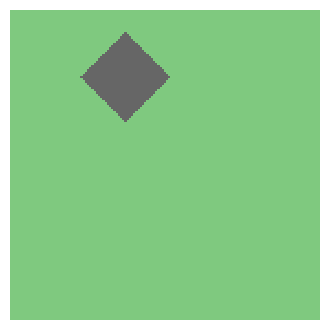

In [ ]:
#this is just to test the update_losange function
themap = np.zeros_like(themap)
losange = make_losange((30,52), size=20)
for point in losange: themap[point] = 2
for point in update_losange(losange, (30,52), (30,52), size=20): themap[point]=1
plot_map(themap)